 # 1.2 Assignment: R/Python Refresher
 # Rahul Rajeev


In [8]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Dataset:** https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download

**Summary:**
I'm not sure if this is a realistic dataset, but it shows student's scores in math, reading, and writing with additional columns describing exam prep, lunch type, parent's education, and race. Two questions I wanted to ask regarding this dataset:

1. What are the distributions of exam scores by test preparation?
2. What are the distributions of exam scores by gender?
3. Are any of the scores collinear?

In [3]:
# importing the dataset
scores = pd.read_csv('studentperformance.csv')
scores.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
# separating data
prepared = scores[scores['test preparation course'] == 'completed']
notprepared = scores[scores['test preparation course'] != 'completed']

print('Number of students that prepared:', len(prepared['math score']), 
      '| Number of students that did not prepare', len(notprepared['math score']))

Number of students that prepared: 358 | Number of students that did not prepare 642


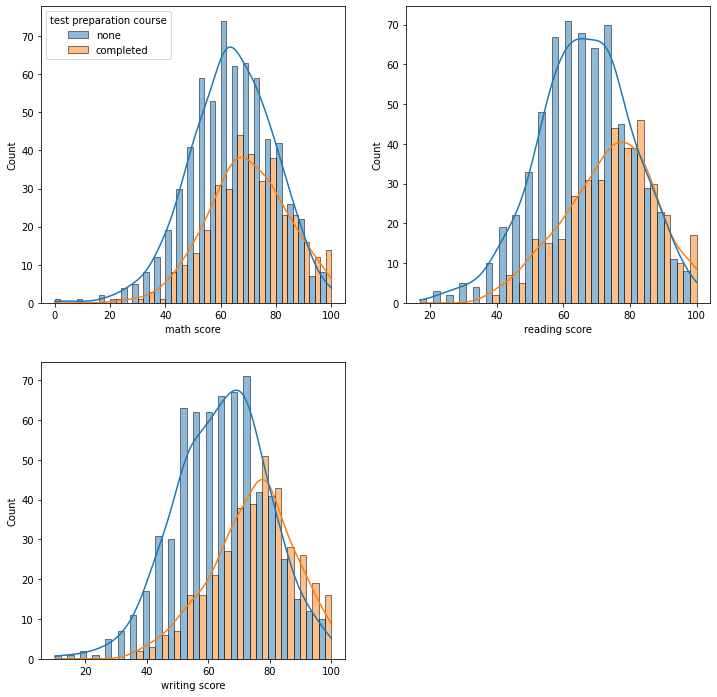

In [21]:
# 2. histograms of math, reading, and writing for those who prepared vs. those who didn't
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
sns.histplot(data=scores, x="math score", hue="test preparation course", multiple="dodge", 
             hue_order = ['none', 'completed'], kde=True,
             edgecolor='black', linewidth=0.5, ax = axs[0,0])
sns.histplot(data=scores, x="reading score", hue="test preparation course", multiple="dodge", 
             hue_order = ['none', 'completed'], kde=True, legend = False,
             edgecolor='black', linewidth=0.5, ax = axs[0,1])
sns.histplot(data=scores, x="writing score", hue="test preparation course", multiple="dodge", 
             hue_order = ['none', 'completed'], kde=True, legend = False,
             edgecolor='black', linewidth=0.5, ax = axs[1,0])
axs[1,1].set_axis_off()
plt.show()

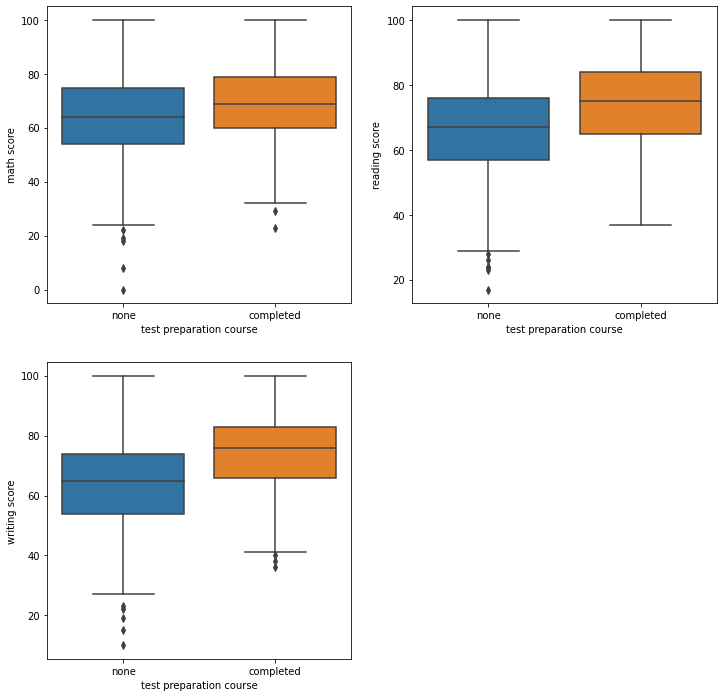

In [23]:
# 3. boxplots of scores for those who prepared vs. those who didn't
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
sns.boxplot(x='test preparation course', y='math score', data=scores, ax = axs[0,0])
sns.boxplot(x='test preparation course', y='reading score', data=scores, ax = axs[0,1])
sns.boxplot(x='test preparation course', y='writing score', data=scores, ax = axs[1,0])
axs[1,1].set_axis_off()
plt.show()

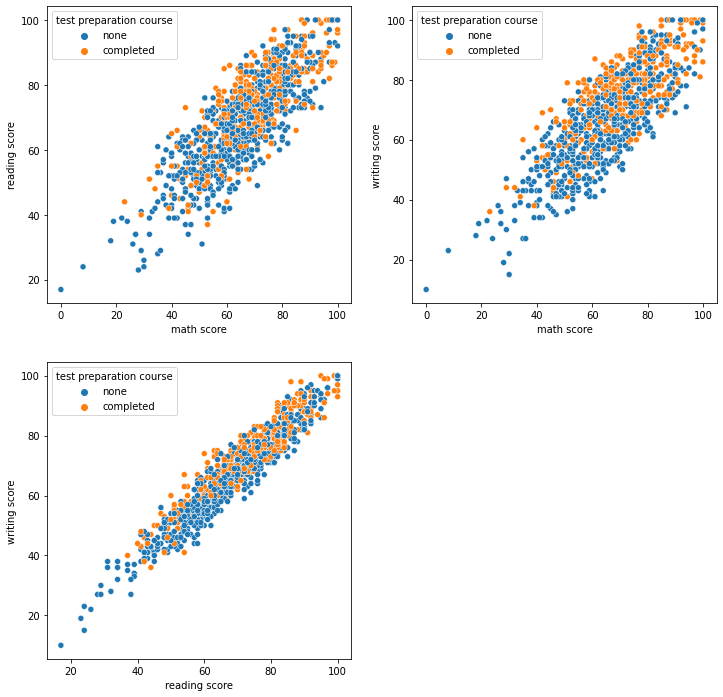

In [26]:
# 4. bivariate plots comparing math score, reading scores, writing scores with prepared vs unprepared
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
sns.scatterplot(x='math score', y='reading score', hue = 'test preparation course', data=scores, ax = axs[0,0])
sns.scatterplot(x='math score', y='writing score', hue = 'test preparation course', data=scores, ax = axs[0,1])
sns.scatterplot(x='reading score', y='writing score', hue = 'test preparation course', data=scores, ax = axs[1,0])
axs[1,1].set_axis_off()
plt.show()

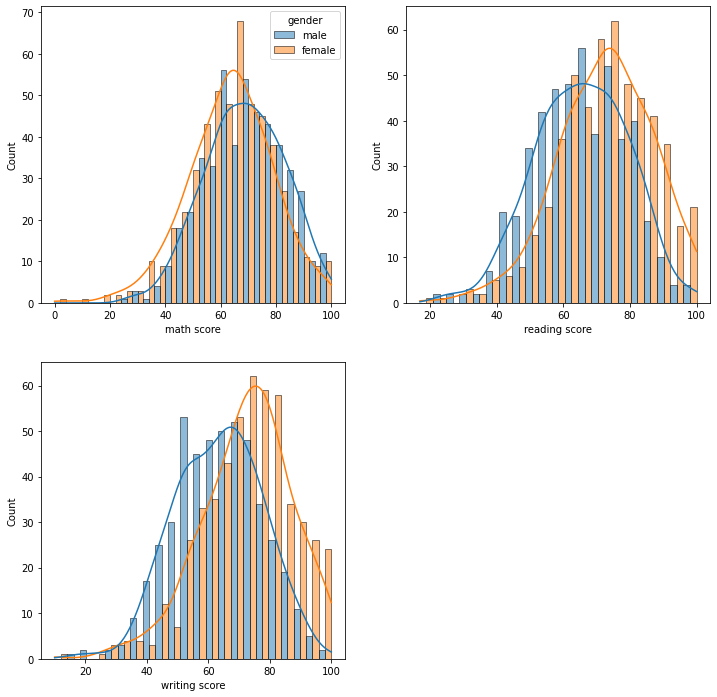

In [28]:
# 5. additional visualization to see whether gender affects score 
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
sns.histplot(data=scores, x="math score", hue="gender", multiple="dodge", 
             hue_order = ['male', 'female'], kde=True,
             edgecolor='black', linewidth=0.5, ax = axs[0,0])
sns.histplot(data=scores, x="reading score", hue="gender", multiple="dodge", 
             hue_order = ['male', 'female'], kde=True, legend = False,
             edgecolor='black', linewidth=0.5, ax = axs[0,1])
sns.histplot(data=scores, x="writing score", hue="gender", multiple="dodge", 
             hue_order = ['male', 'female'], kde=True, legend = False,
             edgecolor='black', linewidth=0.5, ax = axs[1,0])
axs[1,1].set_axis_off()
plt.show()

**Results:** I will summarize the results of what each visualization demonstrated.

1. What are the distributions of exam scores by test preparation?
Even with a smaller amount of people in the prepared section, they are more tightly centered around the higher scores as suspected. The data appears to be skew left for the prepared section and more normally distributed for the unprepared which also makes sense. People are more likely to score higher with exam preparedness and tend to have higher scores than those who don't. 

2. What are the distributions of exam scores by gender?
For both genders, the math score appears to be pretty normally distributed, but for reading and writing, females have skew left distributions with a majority of scores higher than the male population of students. Does this suggest that females are smarter than males in reading and writing? Not necessarily, but for this particular population of students it does show this trend.

3. Are any of the scores collinear?
The scores appear to be highly collinear, but the highest linearity lies with the relationship between reading and writing. Math having high correlation with reading and writing also makes sense since the scores are pretty well distributed regardless of exam prepardness, so having high scores in one exam usually tends to have high scores in the other. But this doesn't mean causation. Having a high math score doesn't necessarily cause high reading/writing. However, having a high comprehension of reading could imply causation with high skills of writing. 